## 3.2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import numba
import urllib.request
import time
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup

In [2]:
def hola():
    print("Hola mundo")

In [3]:
#Hola mundo
hola()

Hola mundo


In [4]:
#Ordenamiento de una columna de un DataFrame
def ordenar(col):
    col=col.sort_values(ascending=False)
    print(col.head())

In [5]:
datos = pd.read_csv("weight-height.csv")
datos=datos["Height"].dropna()
ordenar(datos)

2014    78.998742
3757    78.621374
3285    78.528210
1317    78.462053
994     78.095867
Name: Height, dtype: float64


In [6]:
@numba.jit
#Contar las palabras de un corpus
def contar_palabras(texto):
    listaPalabras = texto.str.split()
    resultado=[]
    #print(listaPalabras)
    frecuenciaPalab = list(listaPalabras.apply(pd.value_counts))
    #print(frecuenciaPalab)
    for palabra in frecuenciaPalab:
        for letra in palabra:
            if letra.isdigit() or len(palabra)>20:
                continue
            resultado.append(palabra)
    #print(resultado)
    #print("El numero total de palabras en el corpus es de: ",len(resultado))
    #print(len(frecuenciaPalab))
    return resultado

In [7]:
#Contamos las palabras distintas de un corpus y su frecuencia
def contar_palabras_distintas(texto):
    resultado = contar_palabras(texto)
    frecuenciaPalab = [resultado.count(p) for p in resultado]
    palabras_no_repetidas = dict(zip(resultado,frecuenciaPalab))
    #print(palabras_no_repetidas)
    print(len(palabras_no_repetidas))

In [8]:
texto = pd.read_csv("SMS_DATA.csv")
texto = texto["Texto"].astype(str)

In [9]:
n_p = contar_palabras(texto) #Contar total de palabras en el texto
print("El numero de palabras en el texto es: ", len(n_p))

El numero de palabras en el texto es:  99437


In [10]:
#Se tarda mucho esta función
contar_palabras_distintas(texto) #Contar el numero de palabras distintas y su frecuencia

KeyboardInterrupt: 

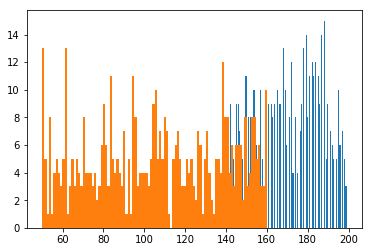

In [11]:
#Graficar datos juntos
path='500_Person_Gender_Height_Weight_Index.csv'
datos = pd.read_csv(path)
x = datos['Height']
y = datos['Weight']
plt.hist(x, bins=100)
plt.hist(y,bins=100)
plt.show()

In [14]:
datos.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0E5176FD0>,
      dtype=object)

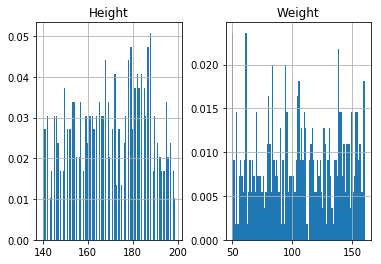

In [12]:
#Graficar por separado
datos = pd.read_csv(path)
datos = datos[['Height','Weight']]
datos.hist(bins=100,density=True)

In [13]:
?datos.hist

Signature:
datos.hist(
    column=None,
    by=None,
    grid=True,
    xlabelsize=None,
    xrot=None,
    ylabelsize=None,
    yrot=None,
    ax=None,
    sharex=False,
    sharey=False,
    figsize=None,
    layout=None,
    bins=10,
    **kwds,
)
Docstring:
Make a histogram of the DataFrame's.

A `histogram`_ is a representation of the distribution of data.
This function calls :meth:`matplotlib.pyplot.hist`, on each series in
the DataFrame, resulting in one histogram per column.

.. _histogram: https://en.wikipedia.org/wiki/Histogram

Parameters
----------
data : DataFrame
    The pandas object holding the data.
column : string or sequence
    If passed, will be used to limit data to a subset of columns.
by : object, optional
    If passed, then used to form histograms for separate groups.
grid : boolean, default True
    Whether to show axis grid lines.
xlabelsize : int, default None
    If specified changes the x-axis label size.
xrot : float, default None
    Rotation of x axis 

In [13]:
#Graficar datos de el Dow Jones juntos
tabla = pd.read_csv("AAPL.csv")
numericas = tabla.dtypes == np.dtype('float64')
columnas_numericas = [key for (key,value) in numericas.to_dict().items() if value]
tabla_num = tabla[columnas_numericas]
tabla_num.head()

,open,high,low,close,change,changePercent,vwap,changeOverTime
0,71.7072,72.3888,71.6560,71.7059,0.262666,0.368,71.9914,0.000000
1,71.5430,71.8241,70.1772,70.5738,-1.132100,-1.579,71.2609,-0.015788
2,69.9986,70.5252,69.4746,69.7569,-0.816882,-1.157,69.8441,-0.027180
3,69.9727,70.2061,68.8967,68.9821,-0.774858,-1.111,69.4256,-0.037986
4,68.7063,69.5954,68.6104,69.2841,0.302061,0.438,69.1567,-0.033774


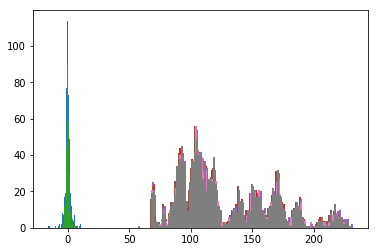

In [14]:
x=tabla_num["change"]
y=tabla_num["changeOverTime"]
z=tabla_num["changePercent"]
a=tabla_num["close"]
b=tabla_num["high"]
c=tabla_num["low"]
d=tabla_num["open"]
e=tabla_num["vwap"]
plt.hist(x, bins=100)
plt.hist(y,bins=100)
plt.hist(z, bins=100)
plt.hist(a,bins=100)
plt.hist(b, bins=100)
plt.hist(c,bins=100)
plt.hist(d, bins=100)
plt.hist(e,bins=100)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262FACE3F98>,
      dtype=object)

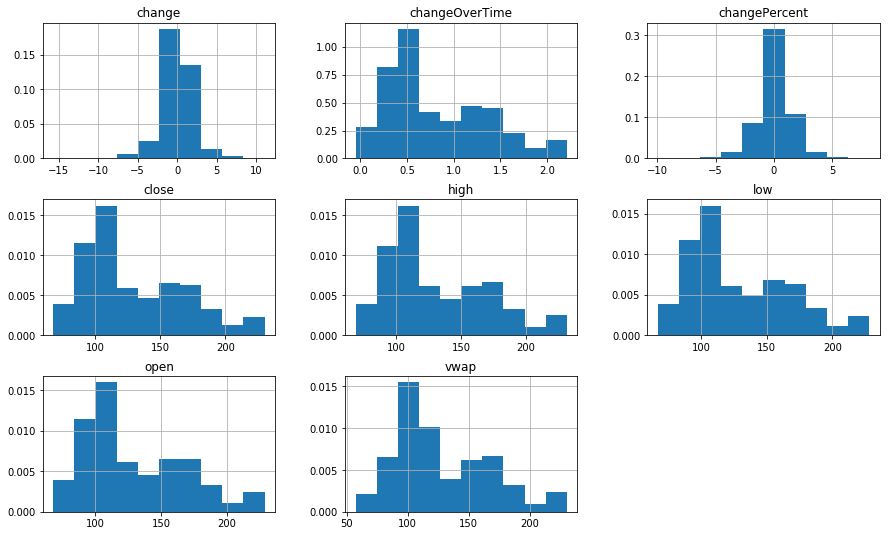

In [15]:
#Graficar datos por separado
tabla_num.hist(bins=10,density=True,figsize=(15,9))

In [42]:
def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None

In [43]:
def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)

In [44]:
def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)

In [45]:
raw_html = simple_get('https://www.crunchyroll.com/es')
len(raw_html)

298784

In [16]:
# Descargar una pagina web y rascar información
url = 'https://www.crunchyroll.com/es'
response = requests.get(url)

In [18]:
soup = BeautifulSoup(response.text, "html.parser")

In [51]:
l=soup.findAll('a')

TypeError: 'ResultSet' object cannot be interpreted as an integer

In [35]:
one_a_tag = soup.findAll('a')[1]
#one_a_tag
link = one_a_tag[‘href’]

<a href="/es/videos/anime" itemprop="url" token="topbar">Series</a>

In [48]:
download_url = 'https://www.crunchyroll.com/'+ link
urllib.request.urlretrieve(download_url,'./'+link[link.find('/turnstile_')+1:])
time.sleep(1)

FileNotFoundError: [Errno 2] No such file or directory: './/es/jojos-bizarre-adventure/episode-25-spicy-lady-782561'

In [36]:
# To download the whole data set, let's do a for loop through all a tags
for i in range(36,len(soup.findAll('a'))+1): #'a' tags are for links
    one_a_tag = soup.findAll('a')[i]
    link = one_a_tag['href']
    download_url = 'https://www.crunchyroll.com/'+ link
    urllib.request.urlretrieve(download_url,'./'+link[link.find('/turnstile_')+1:]) 
    time.sleep(1) #pause the code for a sec

FileNotFoundError: [Errno 2] No such file or directory: './/es/jojos-bizarre-adventure/episode-25-spicy-lady-782561'

### 3.8 
- ¿Que clase de valores atípicos esperas encontrar en los siguientes conjuntos de datos?

    - Calificaciones de estudiantes
        - calificaciones < 0 y mayores a 10 ya que usualmente cuando reprueba una persona se le pone siempre 5 y cuando una persona sale muy bien ó bien en el curso su calificación no pasa de 10.

    - Salarios mensuales
        - menor a 1,000 y mayor a 70,00 ya que las personas que ganan menos de 1,000 al mes talvez si solo trabajan los fines de semana si pero en otro caso es raro y las que ganan mas de 70,000 al mes tambien es muy raro

    - Esperanza de vida en Wikipedia
        - menor a 0 y mayor a 90 ya que es muy raro que una persona viva menos de 0 años y viva mas de 90

## 3.10 
- Escribir una función para extraer los hashtags de publicaciones de tu red social favorita


```python
    def hashtag_extract(publicaciones):
        hastaghs=[]
        for publicacion in publicaciones:
            for palabra in publicacion:
                for letra in palabra:
                    if letra[0]="#":
                        hastaghs.append(letra)
        return hastaghs
```                

## 3.13
- Supon que pagas en Amazon Turk para que anoten el sentimiento de unos textos.¿Como juzgar si el trabajo fue realizado de forma arbitraria o de forma seria?
    - En este caso considero que sería por los valores atípicos que podriamos encontrar en el texto por ejemplo si vemos un enunciado "El perrro juega con la pelota" y te dicen que el sentimiento es triste pues no tendria concordancia con el enunciado porque claramente es uno de tipo feliz aunque podria haber enunciados como "cantaba bajo la lluvia" y no podrias definir triste o feliz porque no tienes mas información por ejemplo de la canción que contaba por lo tanto dependeria mucho de el resultado que te dan o de la interpretación que se le puede dar al texto. 